# CW 4 Part 2: Additional Analysis of the Storks Data
## Contents
1. Introduction
	1. Loading the data
	1. Attributes
1. Regression Models for the Number of Births
	1. Model 1: Predicting Births from number of Stork pairs
	1. Model 2: Predicting Births from number of Humans
	1. Bootstrapping R2
1. Regression Models for the Number of Storks
	1. Model 1: Predicting Storks from Land Area
	1. Model 2: Predicting Storks from Population Density and Suitable Land Area
		1. Dataframe Preparation
		1. Regression Model
	1. Bootstrapping RMSE
1. Conclusion

## 1. Introduction
Storks do not plausibly deliver babies, therefore, other factors will be explored and specifically the predictions of the birth rate from these factors. As there may be a cofounding variable to the number of storks, there will also be regression of the factors that may predict stork numbers.

### 1. A. Loading the data

In [1]:
%matplotlib inline
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

stork = pd.read_csv("storks.csv")
stork

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


### 1. B. Attributes

| Attribute | Description |
|:----------|:-----------:|
| Country | Named country |
| Area | Country area in kilometers squared ($km^2$) |
| Storks | Number of stork pairs in the country |
| Humans | Population in millions of humans in the country |
| BirthRate | Birth rate in 1000s per year in the country |
| SuitableAreaPercent |  The percentage of land area in the country suitable for storks |

## 2. Regression Models for the Number of Births

### 2. A. Model 1: Predicting Births from number of Stork pairs

In [2]:
y1 = stork.BirthRate # the label
x1 = np.array(stork.Storks) # the predictor
X1 = np.reshape(x1, (-1, 1)) # reshape of the predictor so regression can handle it
reg = LinearRegression().fit(X1, y1) #linear regression function
stork_score = reg.score(X1, y1) # this gives the R2 value
print('The R2 coefficient of determination is %4.3f' % stork_score)
print('The intercept is %4.1f' % reg.intercept_)
beta_Storks = reg.coef_
print('Estimated regression coefficient for Number of Storks is %4.2f' % beta_Storks, 
      'change of number of births')

The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient for Number of Storks is 0.03 change of number of births


To compare by how much the number of storks affect birth rate, a regression model has been calculated. The regression suggest that an increase of 1 stork pair will increase the number of births by 0.03 thousand (30) per year, and that a country with 0 stork pairs would have a birth rate of 225 thousand per year. It can be said that this regression is a bad fit, because the R2 coefficient is 0.385. Comparatively, a value of 1 would be perfect, and a value of 0 would be terrible. 
In addition, from the figure below, it can be seen that although the line looks like it fits well, most of the values are low, and the line is 'pulled' by only 2 large values which are far from the rest, likely to make predictions inaccurate. 

In [3]:
y_hat_s = reg.predict(X1) # this predicts the label given the predictors (i.e. the values of the line)

Text(0, 0.5, 'Birth Rate (1000/year)')

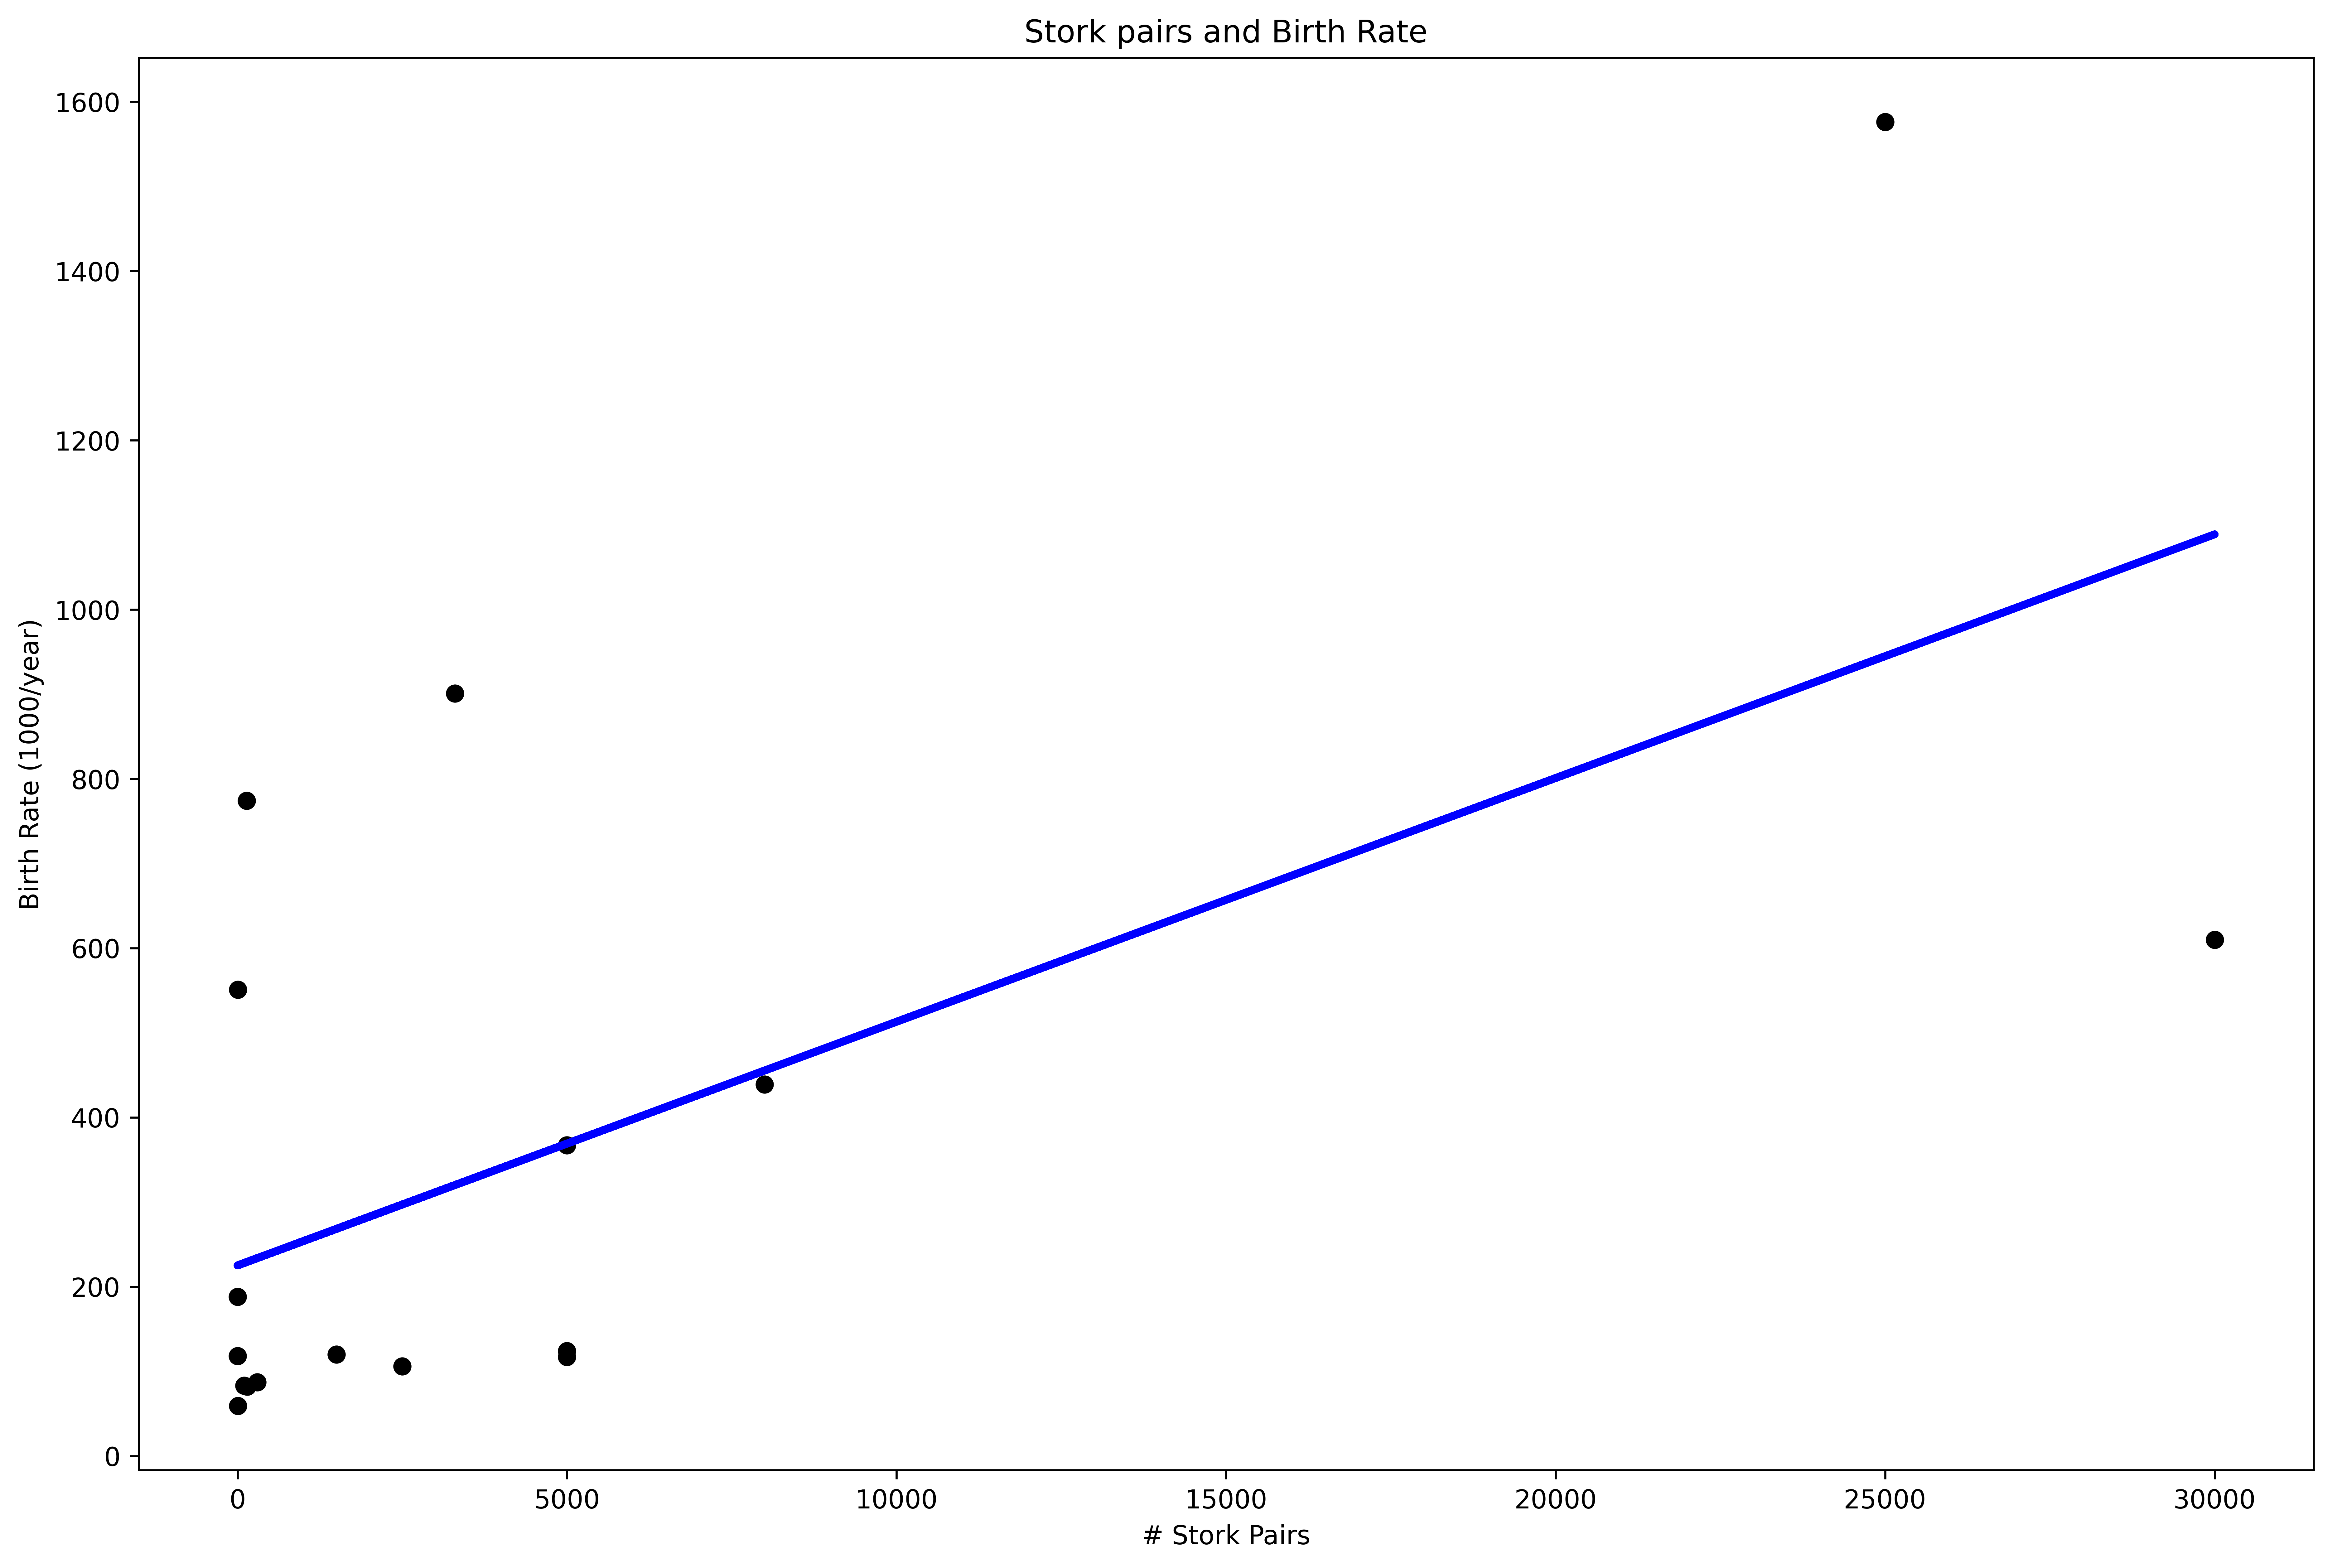

In [4]:
fig, a = plt.subplots(1,1,figsize=(15,10), dpi=600)
a.scatter(x1, y1,  color='black')
a.plot(x1, y_hat_s, color='blue', linewidth=3)

a.set_title("Stork pairs and Birth Rate")
a.set_xlabel('# Stork Pairs')
a.set_ylabel('Birth Rate (1000/year)')

### 2. B. Model 2: Predicting Births from number of Humans

In [5]:
y1 = stork.BirthRate
x2 = np.array(stork.Humans)
X2 = np.reshape(x2, (-1, 1))
reg = LinearRegression().fit(X2, y1)
human_score = reg.score(X2, y1)
print('The R2 coefficient of determination is %4.3f' % human_score)
beta_Humans = reg.coef_
print('Estimated regression coefficient for Number of Humans (per million) is %4.2f' % beta_Humans, 
      'change of number of births (per 1000)')

The R2 coefficient of determination is 0.725
Estimated regression coefficient for Number of Humans (per million) is 14.83 change of number of births (per 1000)


The regression with number of Humans suggests that an increase of 1 million humans will increase the number of births by 14.83 thousand per year.

It can be said that this regression is a good fit, because the R2 coefficient is 0.725. In addition, from the figure below, it can be seen that the line looks like it fits well, and so predictions will be good based upon it.

In [6]:
y_hat_h = reg.predict(X2)

Text(0, 0.5, 'Birth Rate (1000/year)')

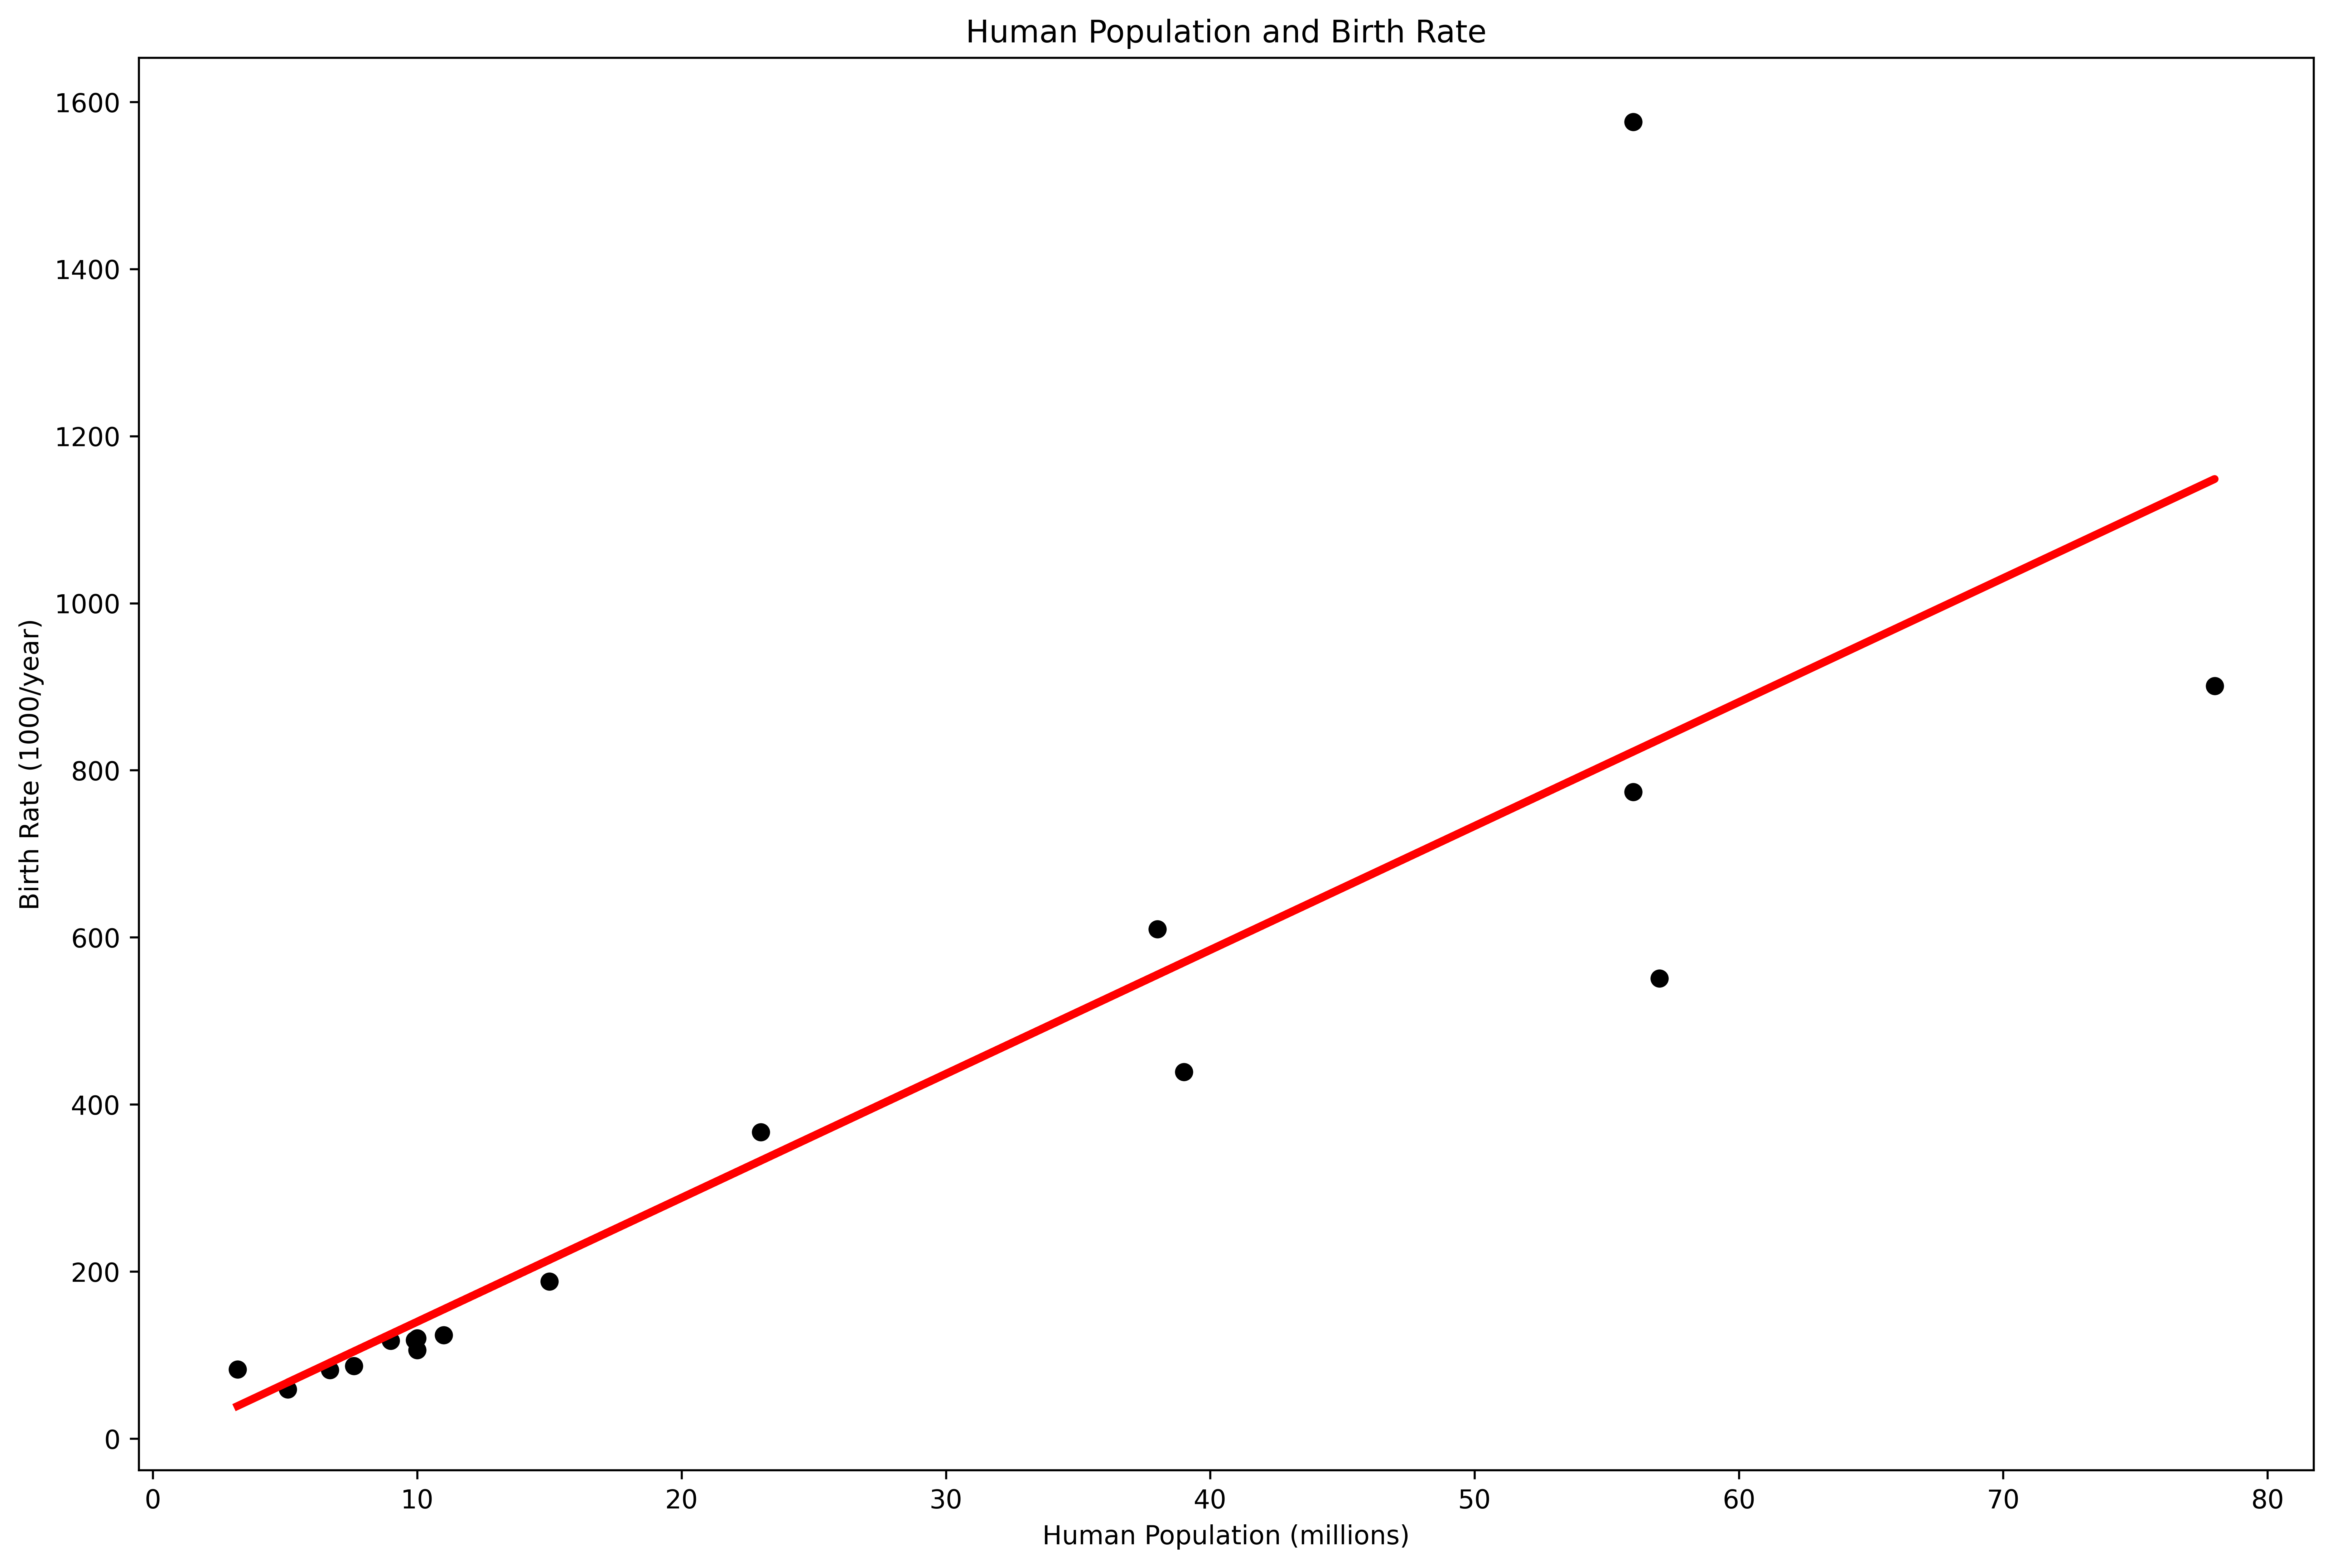

In [7]:
fig, a = plt.subplots(1,1,figsize=(15,10), dpi=600)
a.scatter(x2, y1,  color='black')
a.plot(x2, y_hat_h, color='red', linewidth=3)

a.set_title("Human Population and Birth Rate")
a.set_xlabel('Human Population (millions)')
a.set_ylabel('Birth Rate (1000/year)')

### 2. C. Bootstrapping R2
From this sample, it is calculated that the R2 of population size is bigger than the R2 of the number of storks to predict birth rate. However, if we were to resample this data, this may not always be the case. The following technique called bootstrapping, which will output the spread of possible R2 values. Here, I will calculate the possible differences between the R2 values of both models to see if there is any possibility they could ever be the same (i.e if their difference is likely to be 0).

In [8]:
def bootstrapC(data, cols, repeats, func):
    # Takes the data and 'shuffles' it. Effectively resamples it and then applies a function
    # to every sample 
    
    
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

array([<AxesSubplot:title={'center':'R2 Difference Distribution'}>],
      dtype=object)

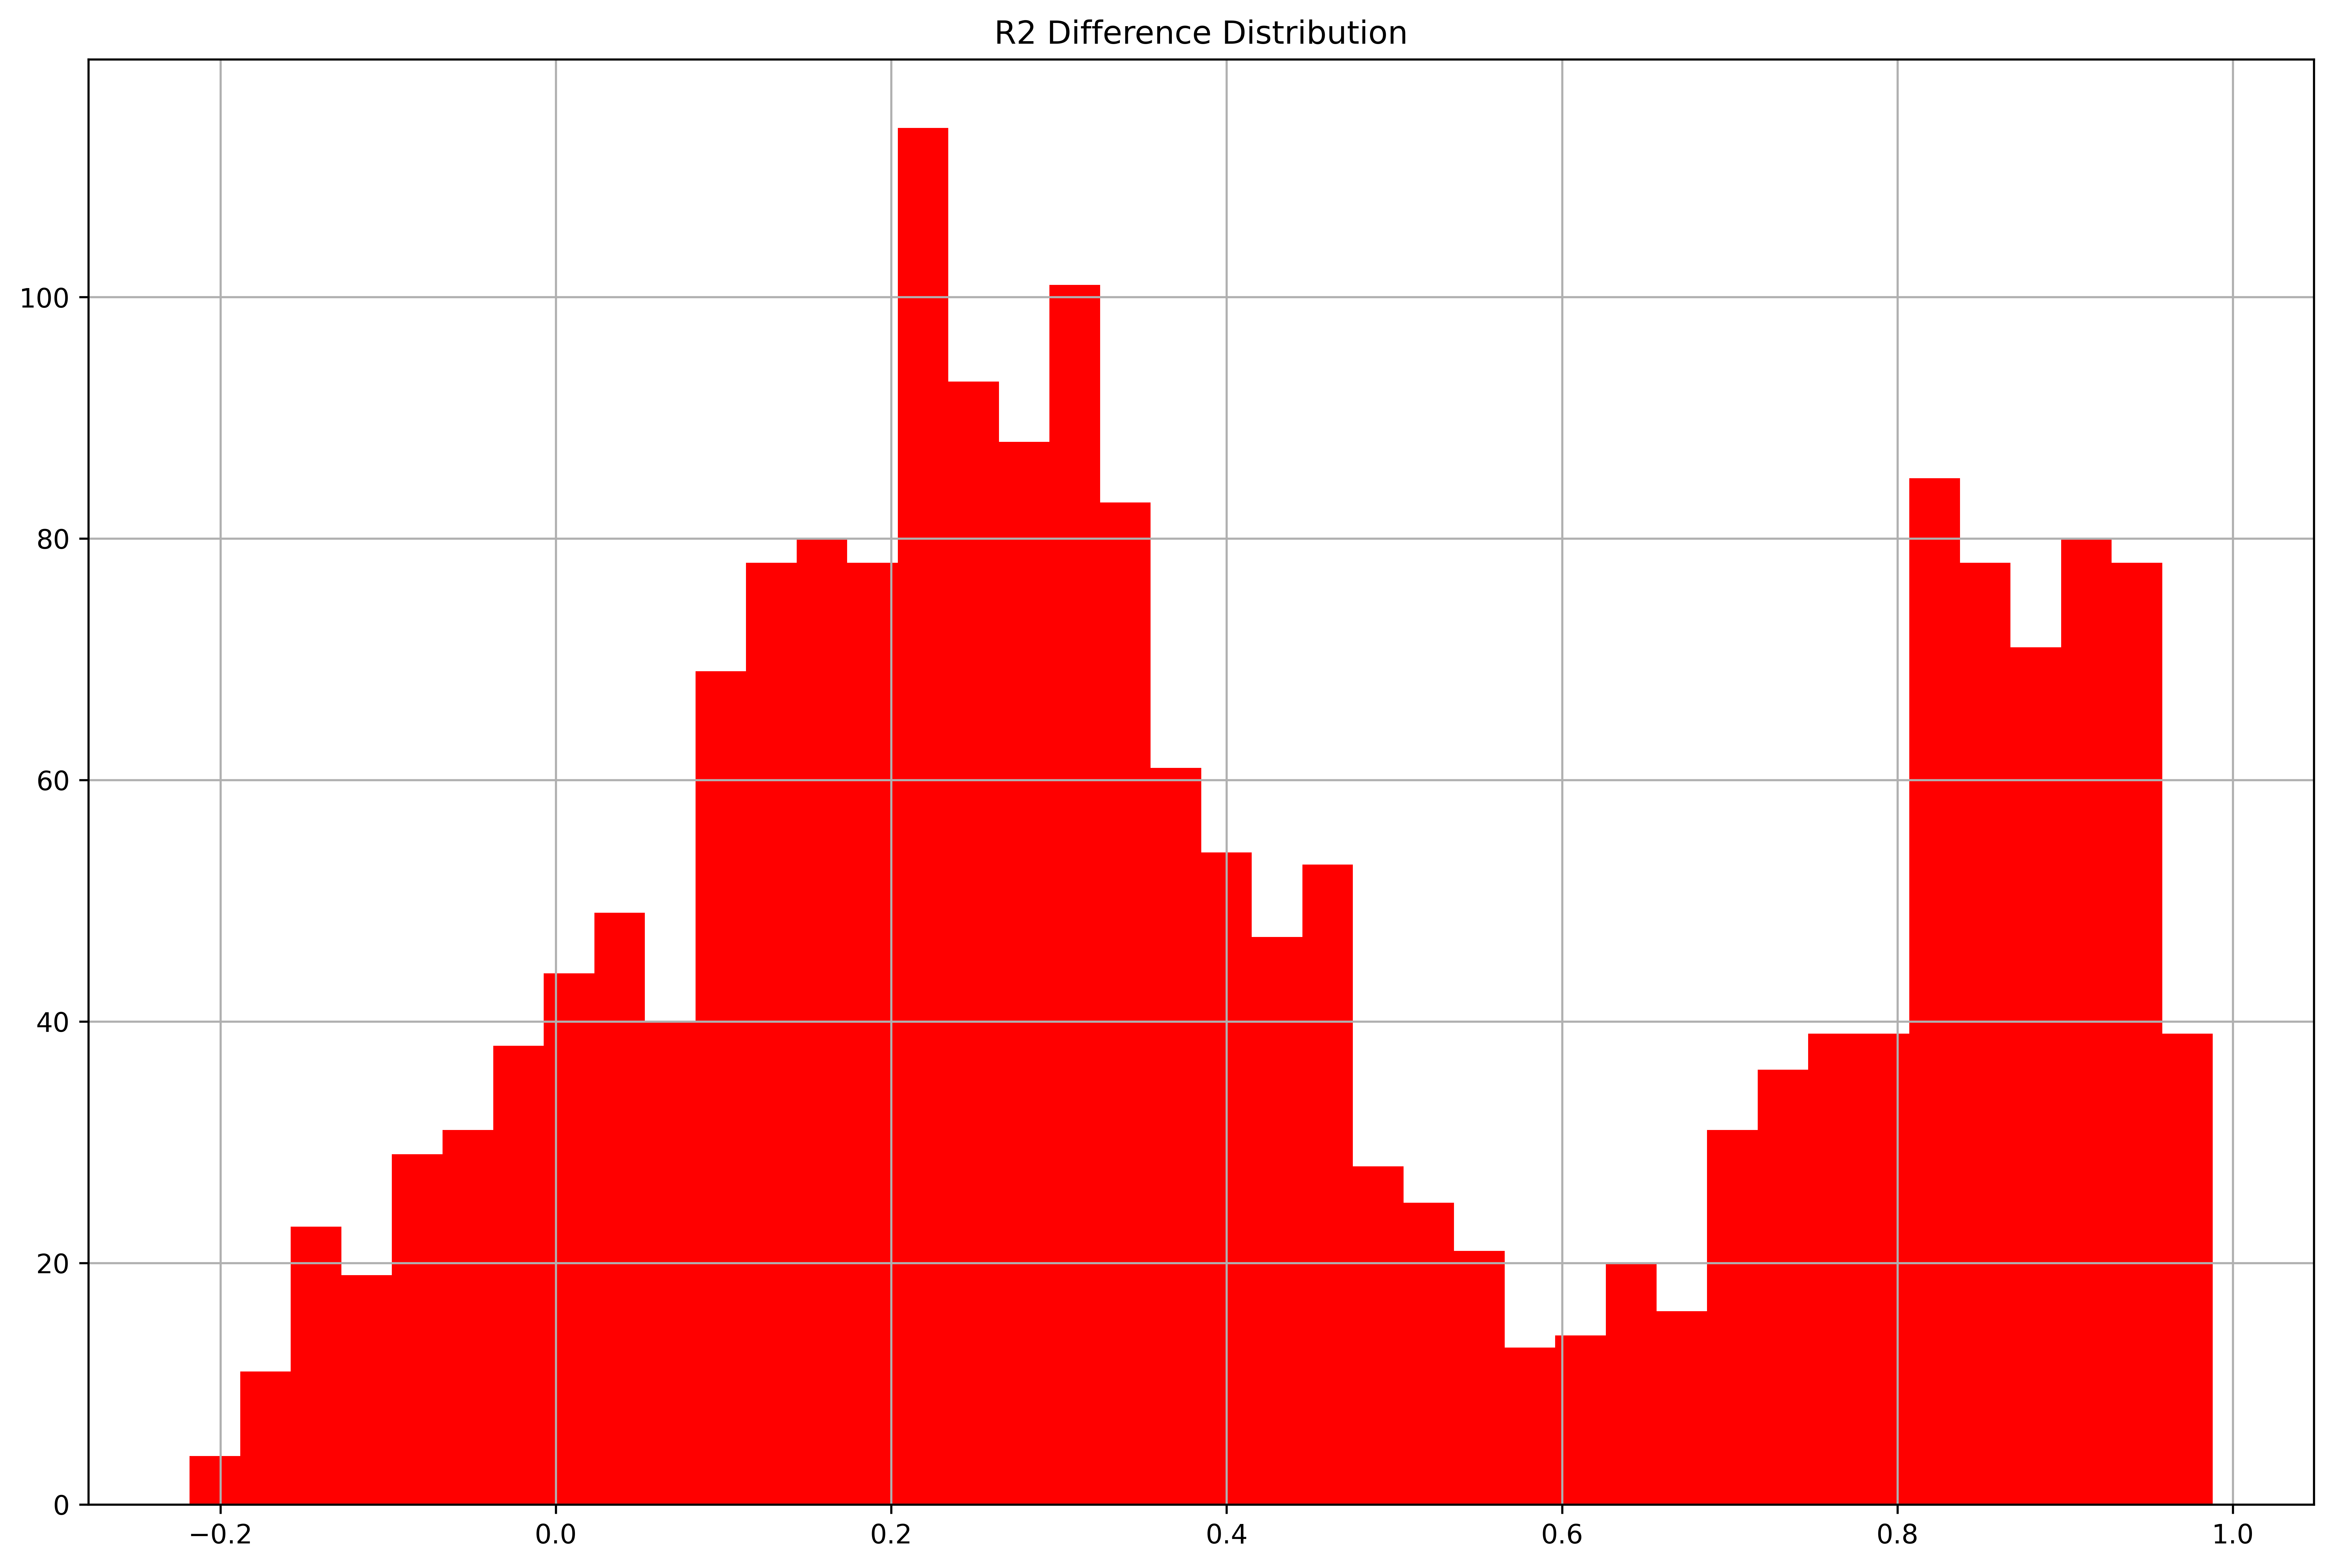

In [28]:
def doRegressionDif(df):
    # Does regression methods like previously, but then subtracts one model from the other*
    y1 = df.BirthRate
    x1 = np.array(df.Storks)
    X1 = np.reshape(x1, (-1, 1))
    reg1 = LinearRegression().fit(X1, y1)
    x2 = np.array(df.Humans)
    X2 = np.reshape(x2, (-1, 1))
    reg2 = LinearRegression().fit(X2, y1)
    score1 = reg2.score(X2, y1)
    score2 = reg1.score(X1, y1)
    return [score1 - score2] # *subtracts here
    
result = bootstrapC(stork, ['R2 Difference Distribution'], 2000, doRegressionDif) 

fig, (a1) = plt.subplots(1,1,figsize=(15,10), dpi=600)

result.hist(bins=40, color="red", ax=a1)

In [33]:
print("The difference between the R2 of Storks and Humans is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (doRegressionDif(stork)[0], result.quantile(0.1), result.quantile(0.9)))
print("The difference between the R2 of Storks and Humans is is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (doRegressionDif(stork)[0], result.quantile(0.05), result.quantile(0.95)))
print("The difference between the R2 of Storks and Humans is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (doRegressionDif(stork)[0], result.quantile(0.005), result.quantile(0.995)))

The difference between the R2 of Storks and Humans is 0.34 with 80% CI 0.03 to 0.90
The difference between the R2 of Storks and Humans is is 0.34 with 90% CI -0.05 to 0.93
The difference between the R2 of Storks and Humans is 0.34 with 99% CI -0.17 to 0.98


Our sample R2 (0.34) is in the range of the 80%, 90% and 99% interval. The difference distribution shows us that if we were to re-sample the data, 99% of the time we will get a difference of the R2 between the two models between approximately -0.17 to 0.98 (variable due to randomisation), so at this interval, we cannot be 99% confident that the R2 is different because it includes 0. We can be 80% confident that the Stork and Human model R2 is different, because we will only get an R2 less than 0.01-0.03 (variable due to randomisation) or more than 0.9 <20% of the time in future samples. In other words, it's approximately 10% (half of 20% from 80%) likely with future samples to get R2 difference less than 0.01-0.03, which suggests that 90% of the time in future samples, Human population has a bigger correlation (the difference is positive) to the birth rate than stork pairs.

## 3. Regression Models for the Number of Storks

### 3. A. Model 1: Predicting Storks from Land Area

In [11]:
y2 = stork.Storks
x3 = np.array(stork.Area)
X3 = np.reshape(x3, (-1, 1))
reg = LinearRegression().fit(X3, y2)
stork_score = reg.score(X3, y2)
print('The R2 coefficient of determination is %4.3f' % stork_score)
beta_Area = reg.coef_
print('Estimated regression coefficient for Area (per km square) is %4.2f' % beta_Area, 
      'change of number of stork pairs')
y_hat_a = reg.predict(X3)
print('Root of the mean squared error: %.2f'% mean_squared_error(y2, y_hat_a, squared=False))
# parameters passed in the mean_squared_error is comparing the real label and the predicted label

The R2 coefficient of determination is 0.336
Estimated regression coefficient for Area (per km square) is 0.02 change of number of stork pairs
Root of the mean squared error: 6984.77


The regression with land area suggests that an increase of 1 $km^2$ will increase the number of stork pairs by 0.02.

It can be said that this regression is NOT a good fit, because the R2 coefficient is 0.336. Also, the root of the mean squared error (RMSE) is 6985, which means our model is not accurate in predicting particular values. A larger RMSE suggests that points are further away from the regression line, and so predictions would be less accurate. In addition, from the figure below, it can be seen that although the line looks like it fits well, most of the stork pair values are low, and the regression line is 'pulled' by 2 large values which are far from the rest, making any predictions inaccurate.

Text(0, 0.5, '# Stork Pairs')

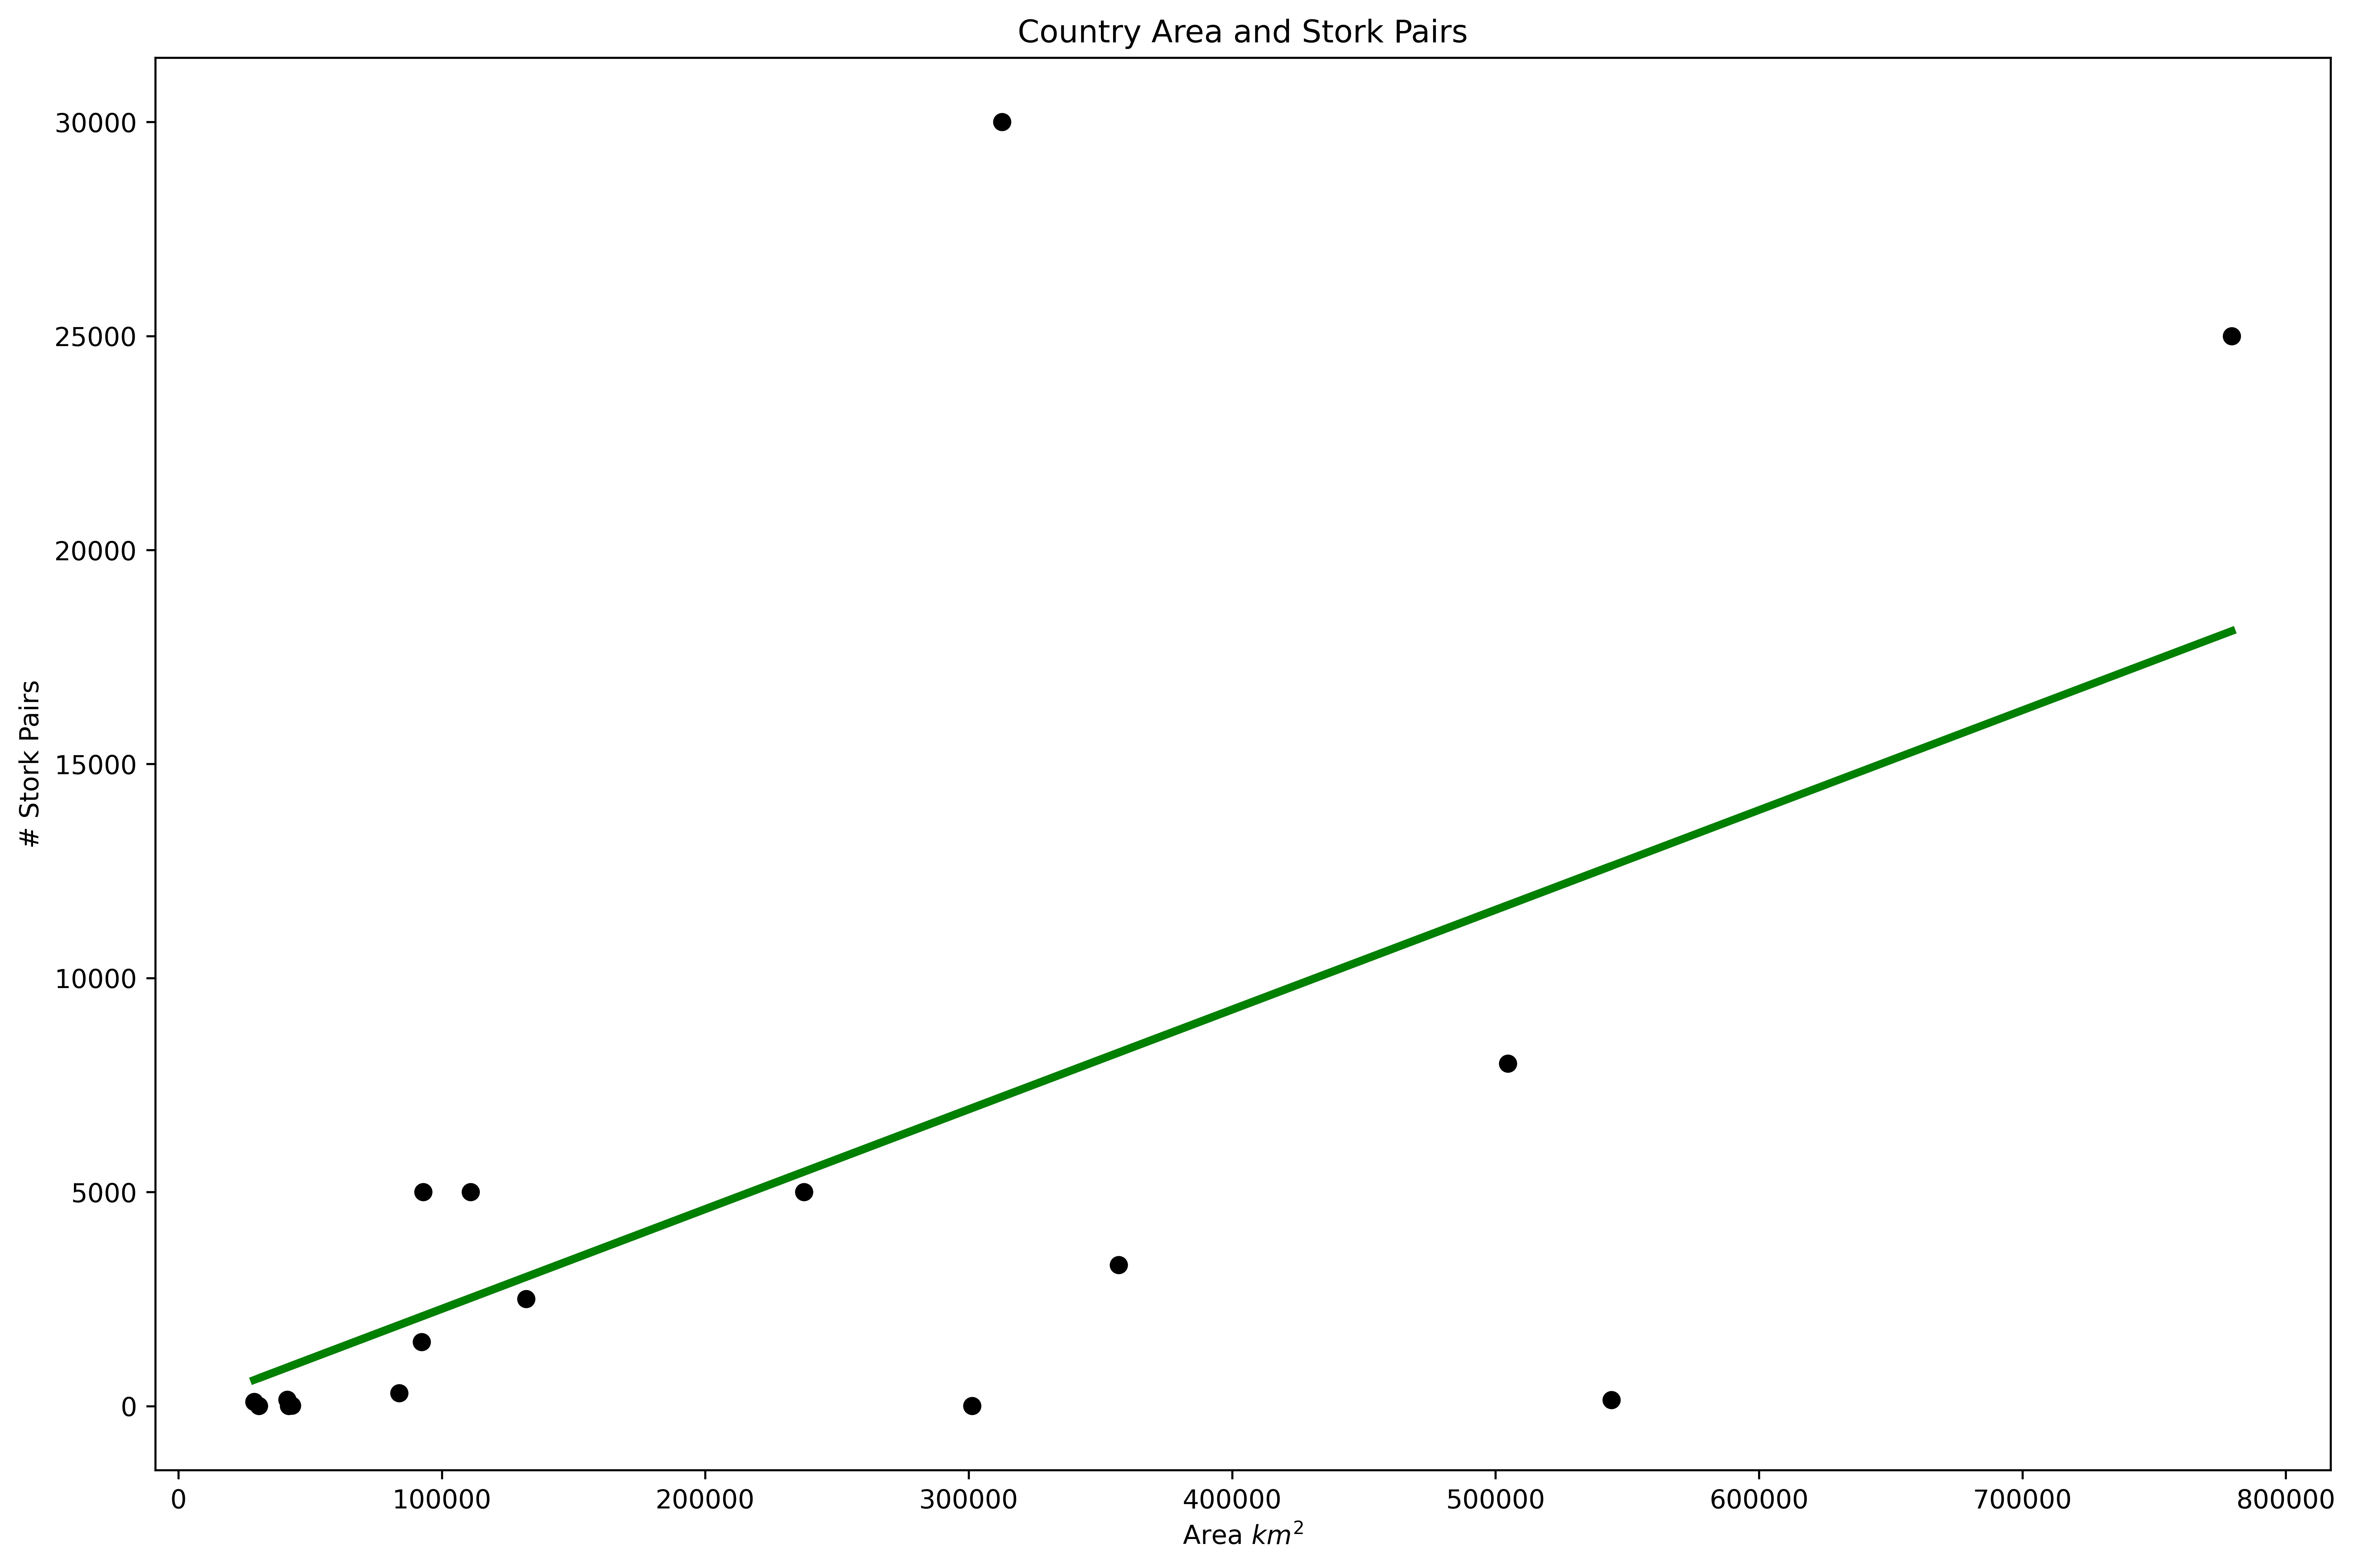

In [12]:
fig, a = plt.subplots(1,1,figsize=(15,10), dpi=600)
a.scatter(x3, y2,  color='black')
a.plot(x3, y_hat_a, color='green', linewidth=3)

a.set_title("Country Area and Stork Pairs")
a.set_xlabel('Area $km^2$')
a.set_ylabel('# Stork Pairs')

### 3. B. Model 2: Predicting Storks from Population Density and Suitable Land Area

#### 3. B. a. Dataframe Preparation
The original data does not have a population density attribute, however, this can be easily calculated from population and land area seen below.

In [13]:
dens_ = stork.assign(PopDens = stork.apply(lambda r: r.Humans * (10)**6 / r.Area, axis=1))
dens = dens_.assign(SuitableArea = dens_.apply(lambda r: r.SuitableAreaPercent * r.Area / 100, axis=1))
## lambda is used here to reduce code, essentially it is an undefined function, for this purpose it
# does a simple calculation of the dataframe
dens

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopDens,SuitableArea
0,Albania,28750,100,3.2,83,55.68,111.304348,16008.000
1,Austria,83860,300,7.6,87,38.34,90.627236,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.377457,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.081081,64368.900
4,Denmark,43100,9,5.1,59,81.46,118.329466,35109.260
5,France,544000,140,56.0,774,58.47,102.941176,318076.800
6,Germany,357000,3300,78.0,901,59.81,218.487395,213521.700
7,Greece,132000,2500,10.0,106,47.31,75.757576,62449.200
8,Holland,41900,4,15.0,188,70.96,357.995227,29732.240
9,Hungary,93000,5000,11.0,124,75.86,118.279570,70549.800


#### 3. B. b. Regression Model

In [24]:
y2 = dens.Storks
X4 = np.column_stack((dens.PopDens,dens.SuitableArea))
reg = LinearRegression().fit(X4, y2)
dens_score = reg.score(X4, y2)
print('The R2 coefficient of determination is %4.3f' % dens_score)
beta_PopDens, beta_SuitableArea = reg.coef_
print('Estimated regression coefficient for population density (population per km square) is %4.2f' % beta_PopDens, 
      'change of number of stork pairs')
print('Estimated regression coefficient for the land area suitable for storks is %4.2f' % beta_SuitableArea, 
      'change of number of stork pairs')
y_hat_p = reg.predict(X4)
print('Root of the mean squared error: %.2f'% mean_squared_error(y2, y_hat_p, squared=False))

The R2 coefficient of determination is 0.393
Estimated regression coefficient for population density (population per km square) is -12.13 change of number of stork pairs
Estimated regression coefficient for the land area suitable for storks is 0.04 change of number of stork pairs
Root of the mean squared error: 6677.03


The regression with population density and land area suggests that an increase of density of 1 person per 𝑘𝑚2 will decrease the number of stork pairs by 12 and that an increase of suitable land area by 1 𝑘𝑚2 will increase the number of stork pairs by 0.04.

It can be said that this regression is a bad fit, because the R2 coefficient is 0.393. Also, the root of the mean squared error is 6677, which means our model is not accurate in predicting particular values, worse than the first model. In addition, from the figure below, it can be seen that the predicted and actual values are not close to the blue line. The blue line is where predicted values would equal the actual values.

Text(0, 0.5, 'Actual # of Stork Pairs')

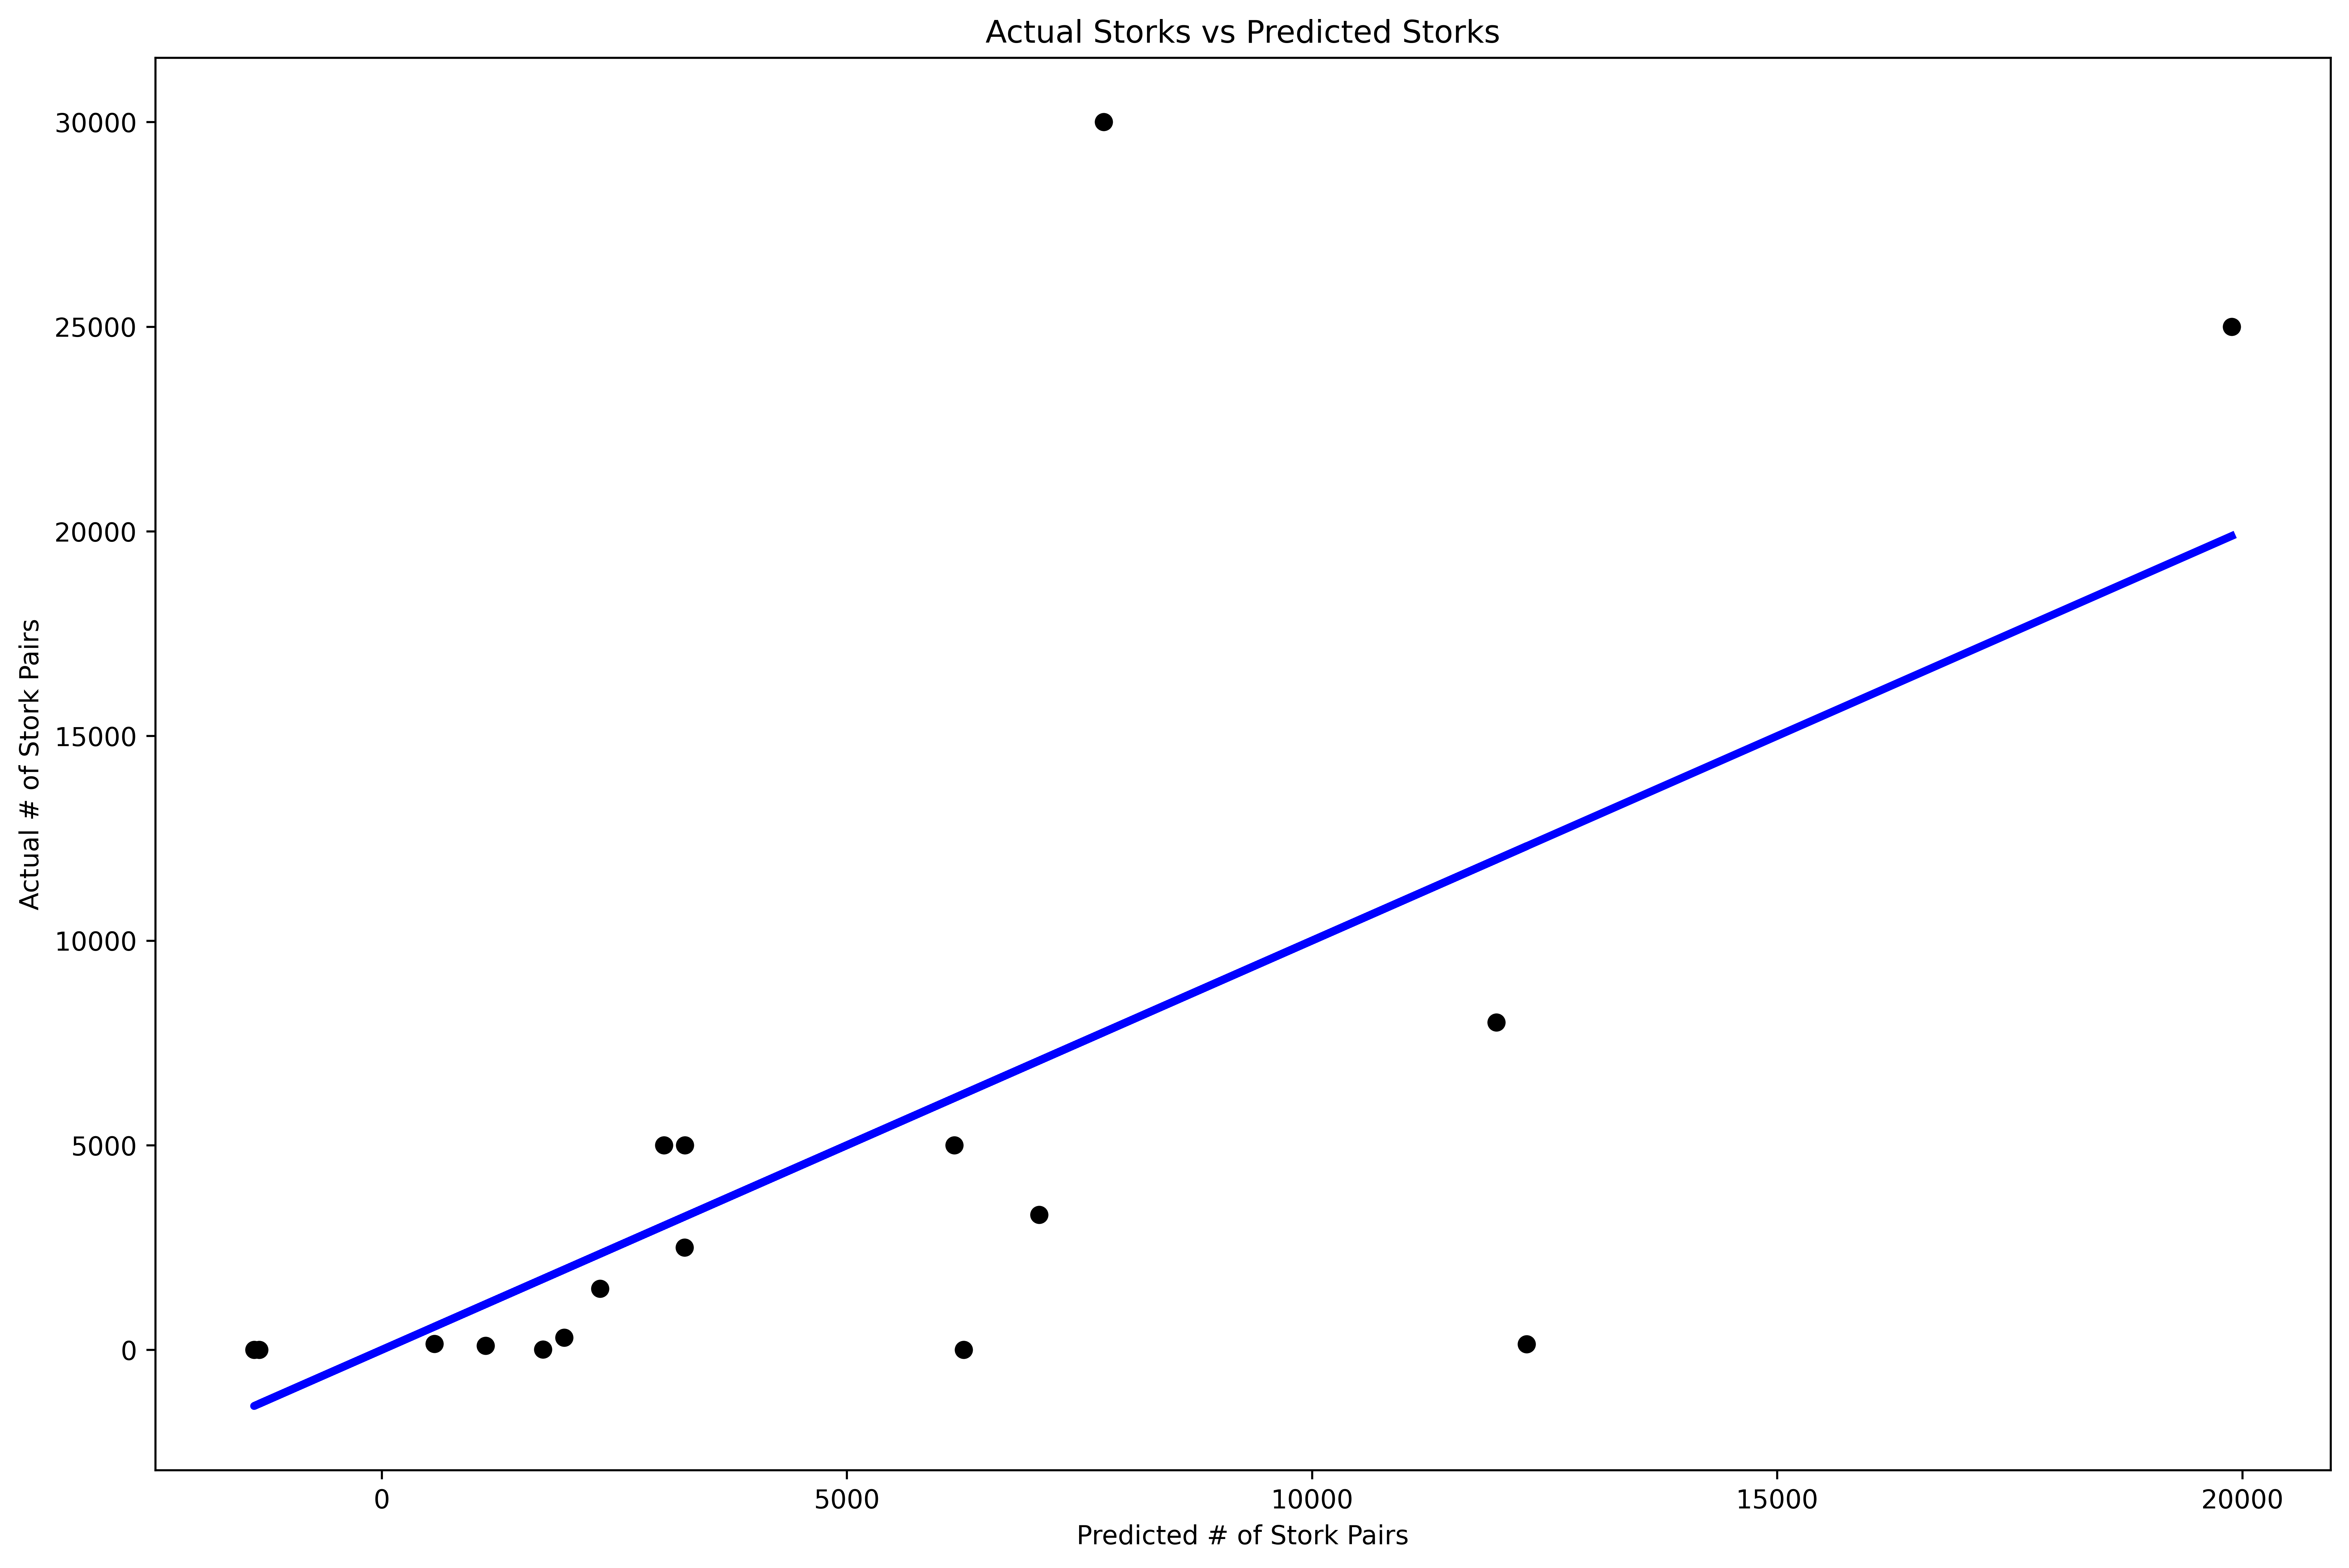

In [21]:
fig, a = plt.subplots(1,1,figsize=(15,10), dpi=600)
a.scatter(y_hat_p, y2,  color='black')
a.plot(y_hat_p, y_hat_p, color='blue', linewidth=3)

a.set_title("Actual Storks vs Predicted Storks")
a.set_xlabel('Predicted # of Stork Pairs')
a.set_ylabel('Actual # of Stork Pairs')

Hence, from this information, the first model is better than the second model. We can confirm or not confirm this from bootstrapping the RMSE in the next section.

### 3. C. Bootstrapping RMSE

array([<AxesSubplot:title={'center':'RMSE Difference Distribution'}>],
      dtype=object)

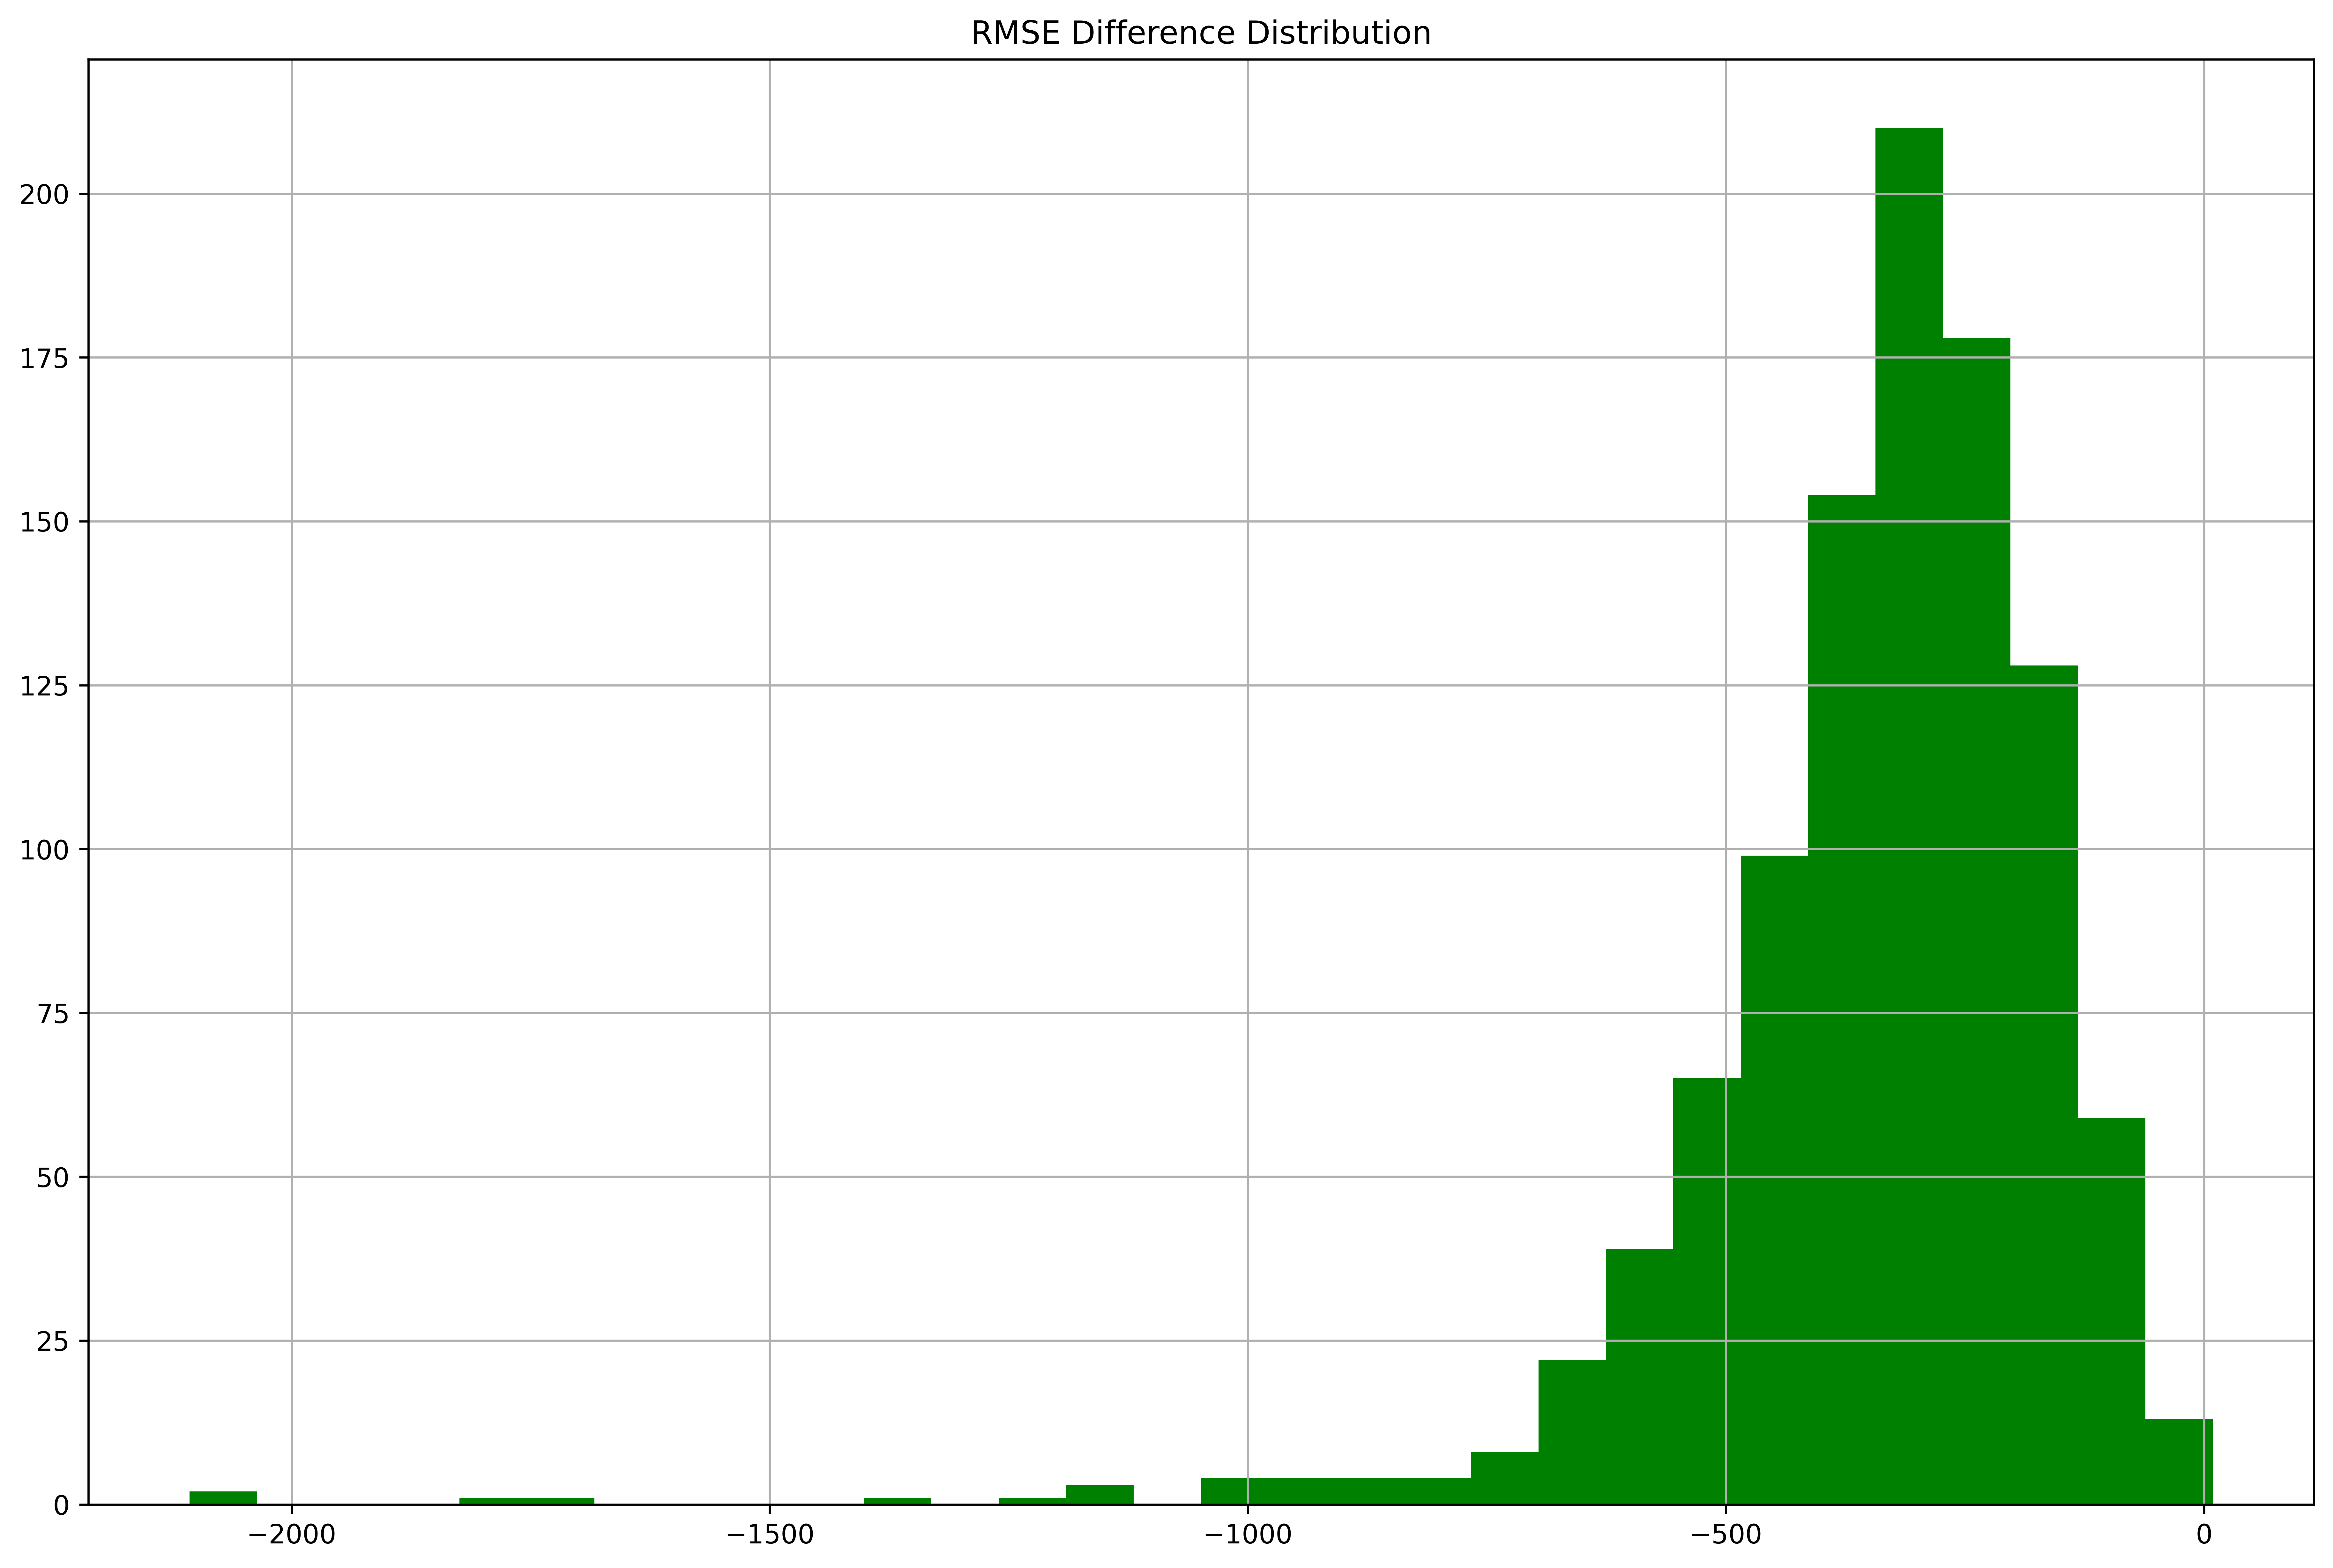

In [25]:
def doRegressionDifR(df):
    y2 = df.Storks
    x3 = np.array(df.Area)
    X3 = np.reshape(x3, (-1, 1))
    reg3 = LinearRegression().fit(X3, y2)
    y_hat_3 = reg3.predict(X3)
    X4 = np.column_stack((df.PopDens,df.SuitableArea))
    reg4 = LinearRegression().fit(X4, y2)
    y_hat_4 = reg4.predict(X4)
    ## Similar to the previous R2 function, but RMSE difference instead
    return [mean_squared_error(y2, y_hat_4, squared=False) - mean_squared_error(y2, y_hat_3, squared=False)] 
    
result = bootstrapC(dens, ['RMSE Difference Distribution'], 1000, doRegressionDifR) 

fig, (a1) = plt.subplots(1,1,figsize=(15,10), dpi=600)

result.hist(bins=30, color="green", ax=a1)

In [23]:
print("The difference between the RMSE of Model 1 and Model 2 is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (doRegressionDifR(dens)[0], result.quantile(0.1), result.quantile(0.9)))
print("The difference between the RMSE of Model 1 and Model 2 is is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (doRegressionDifR(dens)[0], result.quantile(0.05), result.quantile(0.95)))
print("The difference between the RMSE of Model 1 and Model 2 is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (doRegressionDifR(dens)[0], result.quantile(0.005), result.quantile(0.995)))

The difference between the RMSE of Storks and Humans is -307.74 with 80% CI -529.20 to -146.14
The difference between the RMSE of Storks and Humans is is -307.74 with 90% CI -636.52 to -110.38
The difference between the RMSE of Storks and Humans is -307.74 with 99% CI -1409.76 to -11.18


Our sample RMSE (-307) is in the range of the 80%, 90% and 99% interval. The difference distribution shows us that if we were to re-sample the data, 99% of the time we will get a difference of the RMSE between the two models between approximately -1409 to -11 (variable due to randomisation), so at this interval, we can be 99% confident that the RMSE is different and that the suitable land area and population density model (Model 1) RMSE is lower than the land area model (Model 2). This suggests that 99% of the time in future samples, Model 2 is more accurate in predicting stork pair numbers.

## 4. Conclusion

From the regression models we have seen and the subsequent bootstrapping techniques, we can be 80% confident that the number of humans is a better explanation of birth rate than the number of stork pairs.

On the other hand, the correlation of the number of stork pairs with land area or population density and land suitable for storks is poor, however, between the two models, we can be 99% confident that prediction of stork pairs with population density and land suitable for storks is more accurate than predictions with land area alone.